In [1]:
#Import our modules for data analysis, numpy pandas, json

import numpy as np
import pandas as pd
import json

#set pandas options to print dataframes in full scale
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
#Open the json file with the full interactions
with open('starwars-full-interactions-allCharacters.json') as f:
    data = json.load(f)

    
Characters_df = pd.DataFrame(columns=['Name', 'Value'])
#Create a dictionary with the name of the character and the values of how many scenes they appeared
colour_values = {}
counter = 0

#populate the dictionary
for char in data['nodes']: 
    colour_values[char['name']] = char['value']
    
    counter += 1
    
colour_values
for i,j in enumerate(colour_values):
    print(i+1,j)

1 R2-D2
2 CHEWBACCA
3 BB-8
4 QUI-GON
5 NUTE GUNRAY
6 PK-4
7 TC-14
8 OBI-WAN
9 DOFINE
10 RUNE
11 TEY HOW
12 EMPEROR
13 CAPTAIN PANAKA
14 SIO BIBBLE
15 JAR JAR
16 TARPALS
17 BOSS NASS
18 PADME
19 RIC OLIE
20 WATTO
21 ANAKIN
22 SEBULBA
23 JIRA
24 SHMI
25 C-3PO
26 DARTH MAUL
27 KITSTER
28 WALD
29 FODE/BEED
30 JABBA
31 GREEDO
32 VALORUM
33 MACE WINDU
34 KI-ADI-MUNDI
35 YODA
36 RABE
37 BAIL ORGANA
38 GENERAL CEEL
39 BRAVO TWO
40 BRAVO THREE
41 CAPTAIN TYPHO
42 SENATOR ASK AAK
43 ORN FREE TAA
44 SOLA
45 JOBAL
46 RUWEE
47 TAUN WE
48 LAMA SU
49 BOBA FETT
50 JANGO FETT
51 OWEN
52 BERU
53 CLIEGG
54 COUNT DOOKU
55 SUN RIT
56 POGGLE
57 PLO KOON
58 ODD BALL
59 GENERAL GRIEVOUS
60 FANG ZAR
61 MON MOTHMA
62 GIDDEAN DANU
63 CLONE COMMANDER GREE
64 CLONE COMMANDER CODY
65 TION MEDON
66 CAPTAIN ANTILLES
67 DARTH VADER
68 LUKE
69 CAMIE
70 BIGGS
71 LEIA
72 MOTTI
73 TARKIN
74 HAN
75 DODONNA
76 GOLD LEADER
77 WEDGE
78 RED LEADER
79 RED TEN
80 GOLD FIVE
81 RIEEKAN
82 DERLIN
83 ZEV
84 PIETT
85 OZZEL
86 DACK
87

In [3]:
#Create the visualization
import networkx as nx
G = nx.Graph()

#build graph nodes
for node in data['nodes']:
    G.add_node(node['name'])
    
#build graph edges
for edge in data['links']:
    G.add_edge(data['nodes'][edge['source']]['name'], data['nodes'][edge['target']]['name'])

{'R2-D2': 23, 'CHEWBACCA': 19, 'BB-8': 12, 'QUI-GON': 27, 'NUTE GUNRAY': 16, 'PK-4': 2, 'TC-14': 5, 'OBI-WAN': 37, 'DOFINE': 3, 'RUNE': 4, 'TEY HOW': 3, 'EMPEROR': 23, 'CAPTAIN PANAKA': 9, 'SIO BIBBLE': 8, 'JAR JAR': 24, 'TARPALS': 1, 'BOSS NASS': 6, 'PADME': 34, 'RIC OLIE': 7, 'WATTO': 6, 'ANAKIN': 42, 'SEBULBA': 6, 'JIRA': 3, 'SHMI': 8, 'C-3PO': 36, 'DARTH MAUL': 4, 'KITSTER': 9, 'WALD': 5, 'FODE/BEED': 3, 'JABBA': 14, 'GREEDO': 4, 'VALORUM': 4, 'MACE WINDU': 13, 'KI-ADI-MUNDI': 9, 'YODA': 17, 'RABE': 5, 'BAIL ORGANA': 17, 'GENERAL CEEL': 4, 'BRAVO TWO': 3, 'BRAVO THREE': 3, 'CAPTAIN TYPHO': 6, 'SENATOR ASK AAK': 7, 'ORN FREE TAA': 3, 'SOLA': 4, 'JOBAL': 4, 'RUWEE': 4, 'TAUN WE': 4, 'LAMA SU': 2, 'BOBA FETT': 10, 'JANGO FETT': 4, 'OWEN': 7, 'BERU': 8, 'CLIEGG': 5, 'COUNT DOOKU': 10, 'SUN RIT': 6, 'POGGLE': 6, 'PLO KOON': 1, 'ODD BALL': 2, 'GENERAL GRIEVOUS': 3, 'FANG ZAR': 4, 'MON MOTHMA': 10, 'GIDDEAN DANU': 4, 'CLONE COMMANDER GREE': 1, 'CLONE COMMANDER CODY': 4, 'TION MEDON': 1, '

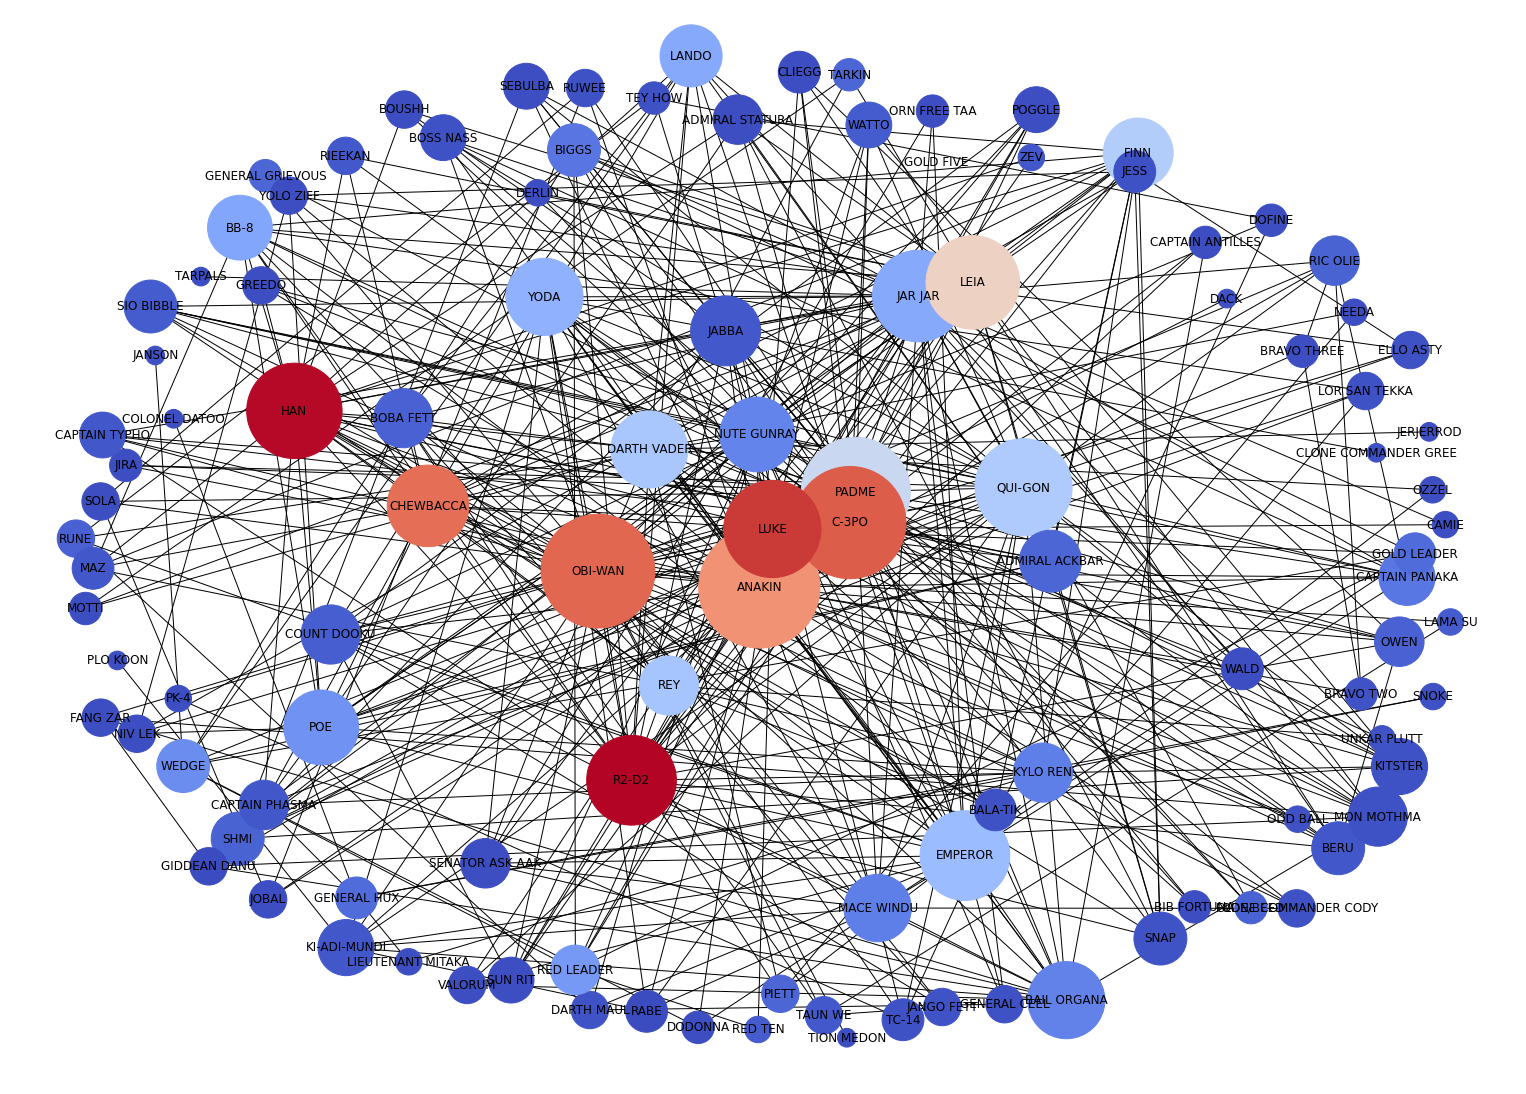

In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams

low, *_, high = sorted(colour_values.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 21, 15
pos = nx.spring_layout(G, scale=20, k=19/np.sqrt(G.order()))
d = dict(G.degree)
print(d)
nx.draw(G, pos,node_color=[mapper.to_rgba(i) 
    for i in colour_values.values()], 
        with_labels=True, 
        nodelist=d, 
        node_size=[d[k]*350 for k in d])


In [5]:
#Number of Nodes in our Database
len(colour_values)

112

In [6]:
#Number of edges in our Database
len(data['links'])

450

In [7]:
#Find Network Diameter
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print(diameter)

6


In [8]:
#Find Average Path Length
x=[sum(j.values()) for (i,j) in nx.shortest_path_length(G)]
avg = sum([sum(j.values()) for (i,j) in nx.shortest_path_length(G)])
avg_sum=(len(x)*len(x))

avg_path= avg/avg_sum
print(avg_path)


2.5931122448979593


In [9]:
#Component Measures
#Is the graph connected?
nx.is_connected(G)

False

In [10]:
#Number of connected components
nx.number_connected_components(G)



2

In [11]:
#Find the Character that makes the graph disconnected
for name in data['nodes']:
    print(len(nx.node_connected_component(G, name['name'])))
    if (len(nx.node_connected_component(G, name['name']))) == 1:
        print(name['name'])





111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
1
GOLD FIVE
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111


In [12]:
#Remove Gold Five to analyze the network as directed
#G.remove_node('GOLD FIVE')


[1, 8, 12, 13, 20, 9, 6, 6, 6, 3, 5, 2, 1, 1, 2, 0, 2, 3, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 12, 13, 14, 14, 16, 16, 17, 17, 17, 19, 23, 23, 24, 25, 26, 27, 27, 34, 36, 37, 42]


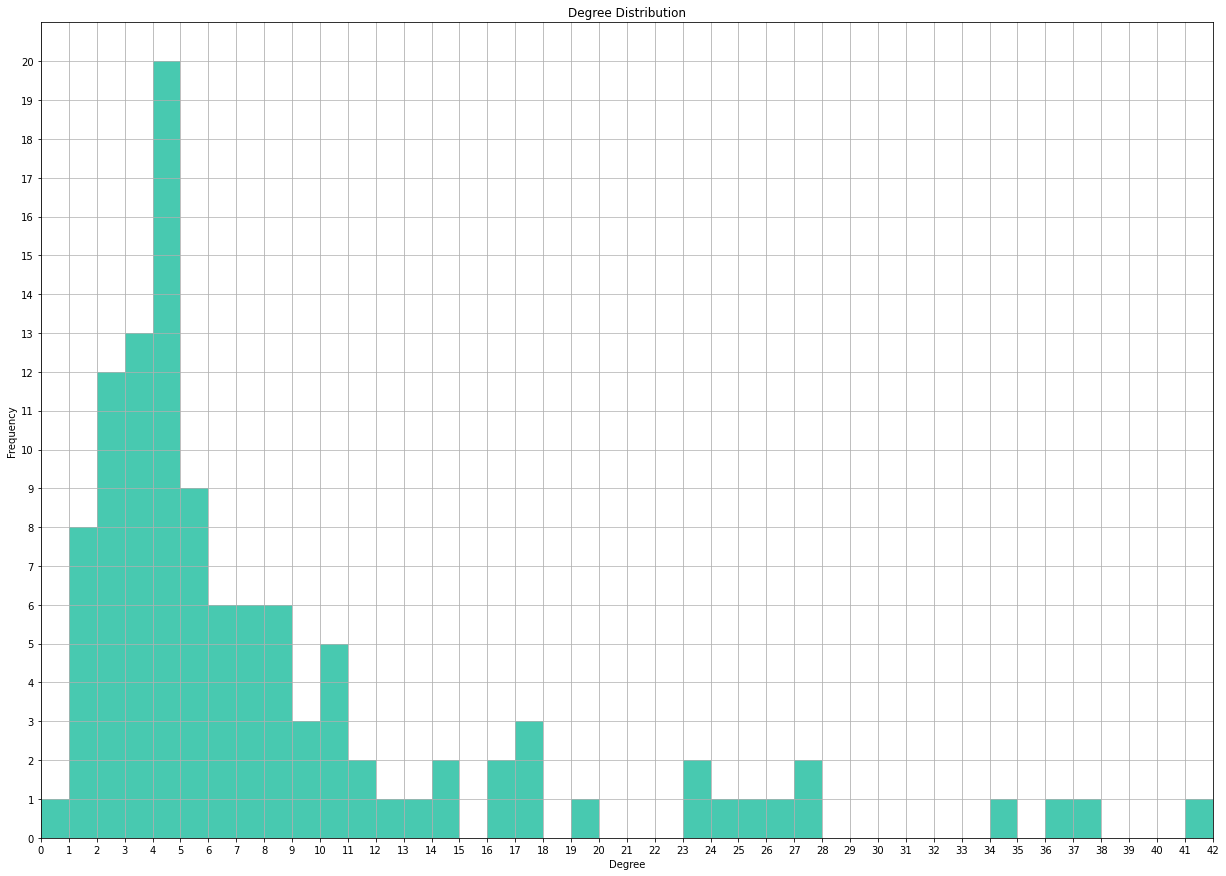

In [13]:
#Find Degree Distribution
histogram = nx.degree_histogram(G)
#print(len(histogram))
print(histogram)
frequency=[]
for i,x in enumerate(histogram):
    for _ in range(0,x):
        frequency.append(i)
print((frequency))

degree = pd.Series(frequency)
xscale = [i for i in range(0,43)]
yscale = [i for i in range(0,21)]
degree.plot.hist(grid=True, rwidth=1,bins=42,
                   color='#48C9B0',yticks=yscale ,ylim=(0,21), xlim=(0,42), xticks=xscale)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.9)

In [14]:
#Average Degree
avg_degree=sum(frequency) / 112
print(avg_degree)

8.035714285714286


In [15]:
#Check if ANAKIN (based of the diagram) is the charachter with the maximun degree)
c_neighbors=[]
for x in(nx.neighbors(G, 'ANAKIN')):
    c_neighbors.append(x)
print(len(c_neighbors))

42


{'ANAKIN': 0.3783783783783784, 'OBI-WAN': 0.3333333333333333, 'C-3PO': 0.32432432432432434, 'PADME': 0.3063063063063063, 'QUI-GON': 0.24324324324324323, 'LUKE': 0.24324324324324323, 'HAN': 0.23423423423423423, 'LEIA': 0.22522522522522523, 'JAR JAR': 0.21621621621621623, 'R2-D2': 0.2072072072072072, 'EMPEROR': 0.2072072072072072, 'CHEWBACCA': 0.17117117117117117, 'YODA': 0.15315315315315314, 'BAIL ORGANA': 0.15315315315315314, 'DARTH VADER': 0.15315315315315314}


<BarContainer object of 15 artists>

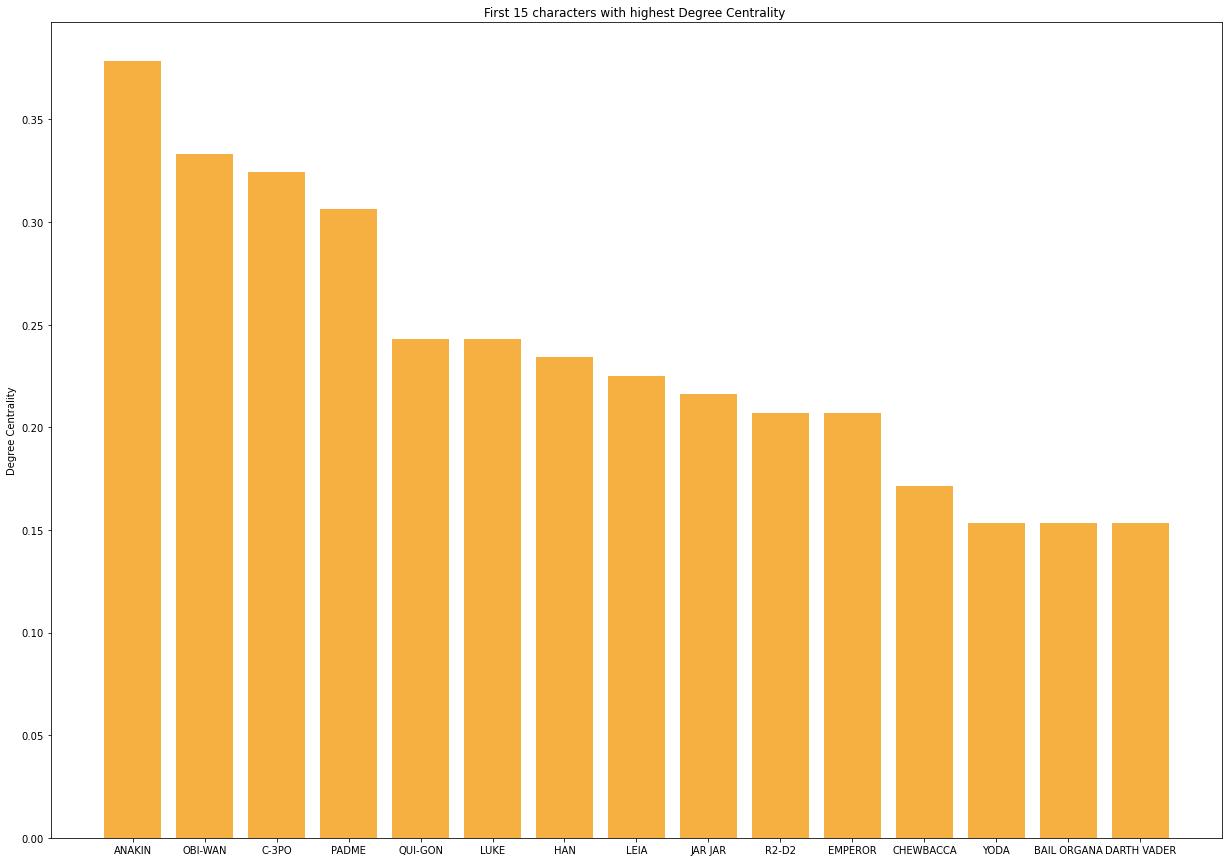

In [16]:
#Degree Centrality
import operator
dc_of_total=nx.degree_centrality(G)
max_15_chars = dict(sorted(dc_of_total.items(), key=operator.itemgetter(1), reverse=True)[:15])
print(max_15_chars)

keys = max_15_chars.keys()
values = max_15_chars.values()
fig, ax = plt.subplots()
ax.set_ylabel('Degree Centrality')
ax.set_title('First 15 characters with highest Degree Centrality ')
plt.bar(keys, values, color='#F5B041')

In [17]:
#Betweeness Centrality
bc_of_total=nx.betweenness_centrality(G)

bc_max_15_chars = dict(sorted(bc_of_total.items(), key=operator.itemgetter(1), reverse=True)[:15])
print(bc_max_15_chars)

{'OBI-WAN': 0.20527616510286287, 'C-3PO': 0.16810394625192118, 'ANAKIN': 0.158361912998823, 'LUKE': 0.14168316245036236, 'HAN': 0.09639612279428685, 'DARTH VADER': 0.08517938476817415, 'EMPEROR': 0.07460384397884799, 'POE': 0.07311634680967487, 'PADME': 0.06812570259202824, 'CHEWBACCA': 0.061258184622169476, 'KYLO REN': 0.05408852409099521, 'LEIA': 0.05398153467757085, 'NUTE GUNRAY': 0.03958121144097958, 'JAR JAR': 0.03858670439341421, 'R2-D2': 0.0373812798946585}


<BarContainer object of 15 artists>

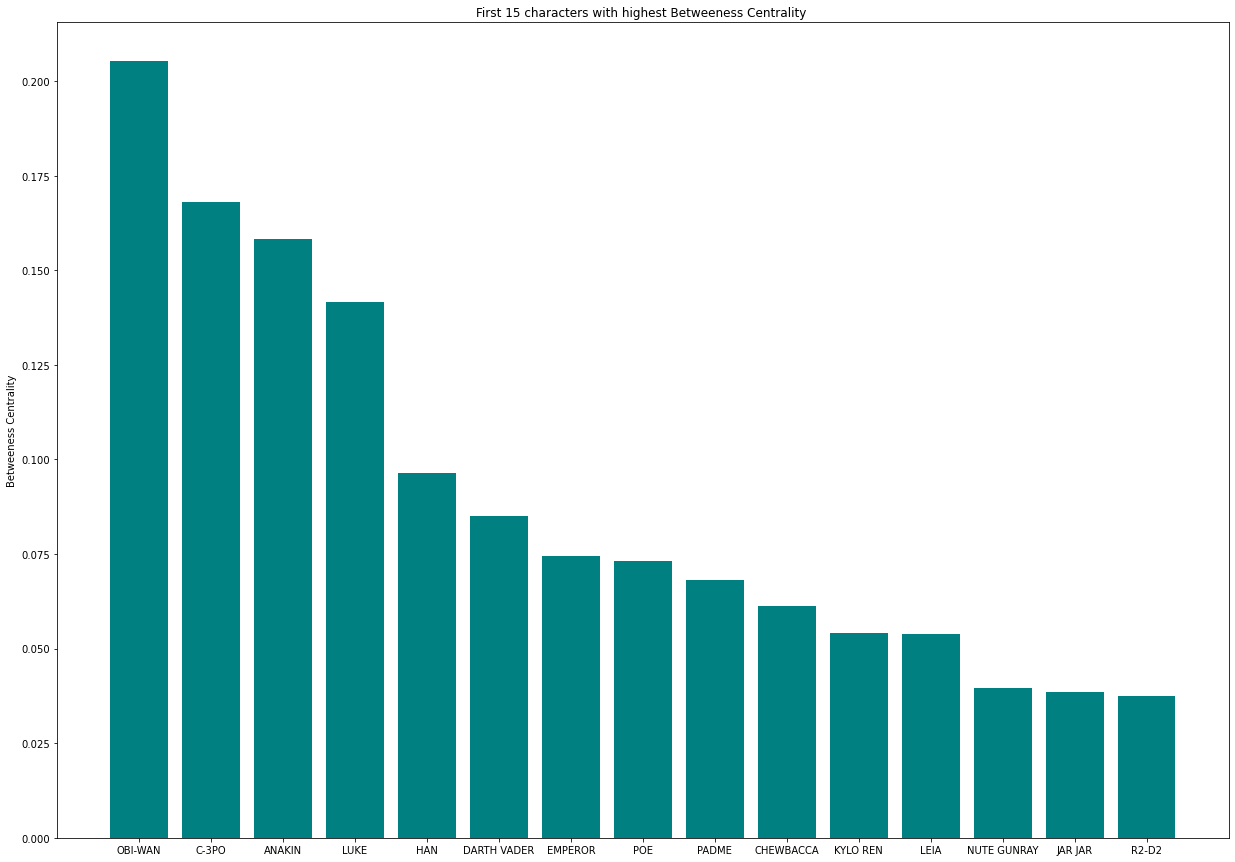

In [18]:
keys1 = bc_max_15_chars.keys()
values1 = bc_max_15_chars.values()
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Betweeness Centrality')
ax1.set_title('First 15 characters with highest Betweeness Centrality ')
plt.bar(keys1, values1, color='teal')

{'C-3PO': 0.5619021082938609, 'OBI-WAN': 0.559020559020559, 'ANAKIN': 0.5505505505505506, 'LUKE': 0.526613570091831, 'R2-D2': 0.5166303744502797, 'HAN': 0.5117793850188217, 'EMPEROR': 0.5023456636359862, 'LEIA': 0.493253434429905, 'PADME': 0.4910315721126532, 'CHEWBACCA': 0.48882963681169955, 'DARTH VADER': 0.48882963681169955, 'QUI-GON': 0.4781096886360044, 'YODA': 0.47190047190047185, 'JABBA': 0.46386812344259154, 'BAIL ORGANA': 0.45420420420420415}


<BarContainer object of 15 artists>

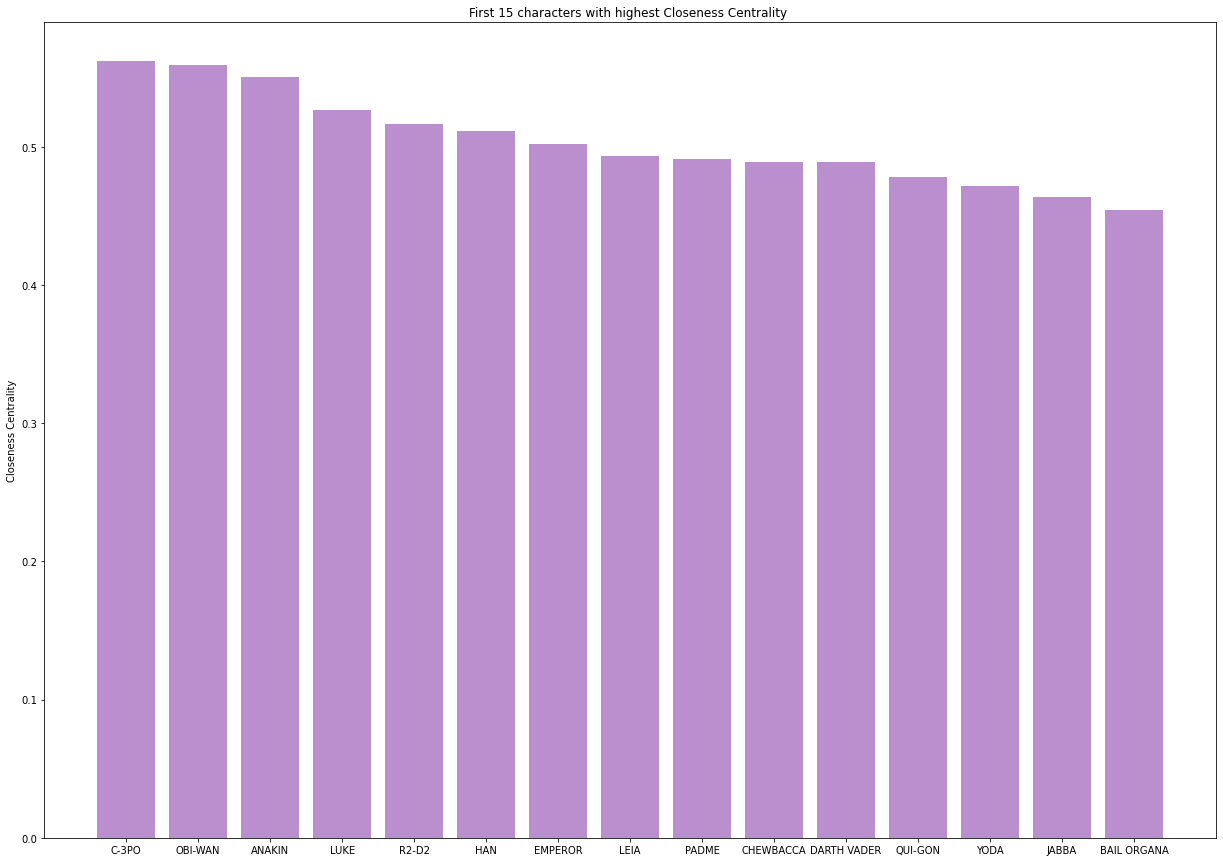

In [19]:
#Closeness Centrality
cc_of_total = nx.closeness_centrality(G)

cc_max_15_chars = dict(sorted(cc_of_total.items(), key=operator.itemgetter(1), reverse=True)[:15])
print(cc_max_15_chars)
keys2 = cc_max_15_chars.keys()
values2 = cc_max_15_chars.values()
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Closeness Centrality')
ax2.set_title('First 15 characters with highest Closeness Centrality ')
plt.bar(keys2, values2, color='#BB8FCE')

{'ANAKIN': 0.29656614921513724, 'OBI-WAN': 0.2810463592564618, 'C-3PO': 0.2753430975993982, 'PADME': 0.2580025161393472, 'QUI-GON': 0.22896839403488994, 'R2-D2': 0.22771376143671906, 'EMPEROR': 0.21093374567650905, 'LUKE': 0.1910749236779175, 'JAR JAR': 0.18640579189248813, 'YODA': 0.1811452089439929, 'BAIL ORGANA': 0.17124803640784939, 'HAN': 0.16600713373201345, 'LEIA': 0.16167962569690836, 'JABBA': 0.1431368678841115, 'CHEWBACCA': 0.14197931166864483}


<BarContainer object of 15 artists>

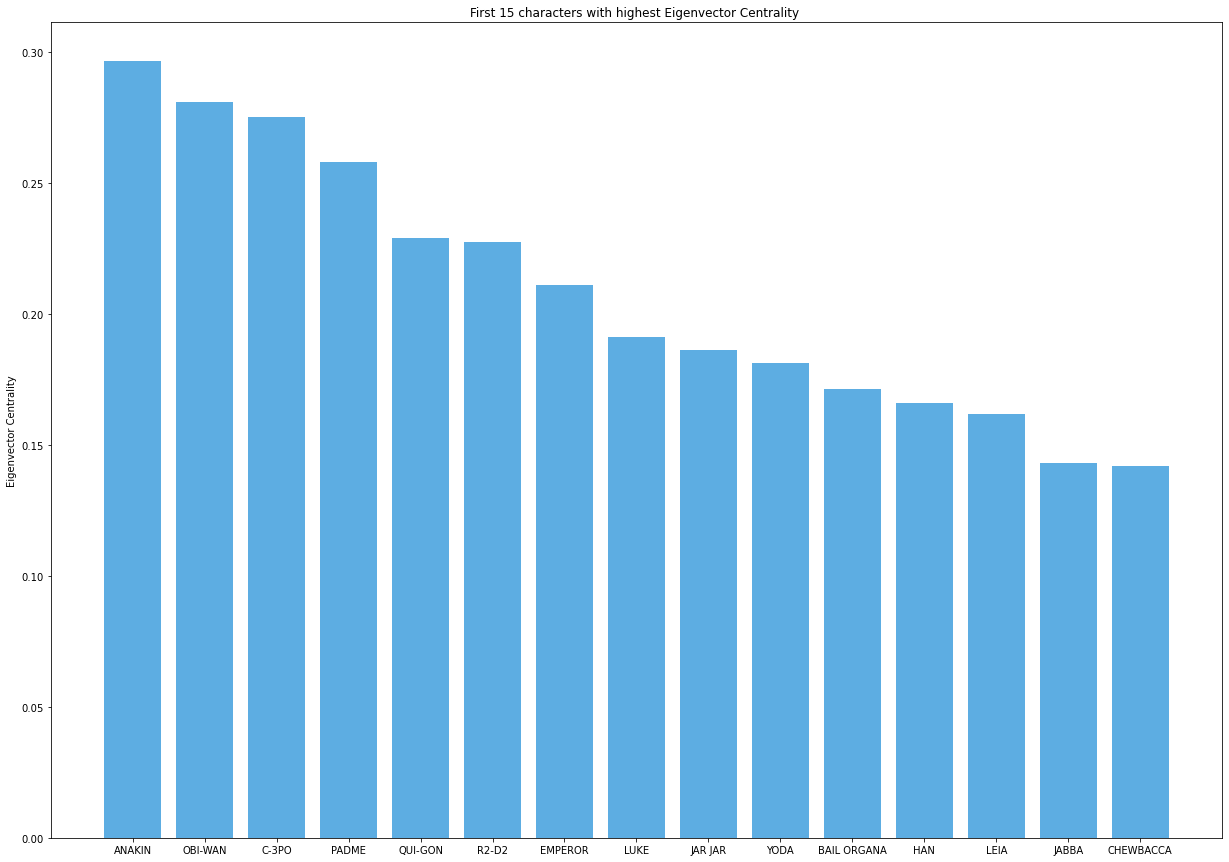

In [20]:
#Eigenvector Centrality
ec_of_total = nx.eigenvector_centrality(G)

ec_max_15_chars = dict(sorted(ec_of_total.items(), key=operator.itemgetter(1), reverse=True)[:15])
print(ec_max_15_chars)
keys3 = ec_max_15_chars.keys()
values3 = ec_max_15_chars.values()
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Eigenvector Centrality')
ax3.set_title('First 15 characters with highest Eigenvector Centrality ')
plt.bar(keys3, values3, color='#5DADE2')

In [21]:
#Find the Density of the Graph
nx.density(G)

0.07239382239382239

In [24]:
#Find the bridges of the Network
nx.has_bridges(G)

True

In [32]:
#Which nodes are the bridges of our network?
list(nx.bridges(G))

[('OBI-WAN', 'TION MEDON'),
 ('JAR JAR', 'TARPALS'),
 ('KI-ADI-MUNDI', 'PLO KOON'),
 ('YODA', 'CLONE COMMANDER GREE'),
 ('DARTH VADER', 'JERJERROD'),
 ('LUKE', 'DACK'),
 ('WEDGE', 'JANSON'),
 ('GENERAL HUX', 'COLONEL DATOO')]

In [29]:
#Find local Bridges
list(nx.local_bridges(G))

[('OBI-WAN', 'TION MEDON', inf),
 ('JAR JAR', 'TARPALS', inf),
 ('GREEDO', 'HAN', 3),
 ('KI-ADI-MUNDI', 'PLO KOON', inf),
 ('YODA', 'CLONE COMMANDER GREE', inf),
 ('DARTH VADER', 'JERJERROD', inf),
 ('LUKE', 'DACK', inf),
 ('WEDGE', 'JANSON', inf),
 ('GENERAL HUX', 'COLONEL DATOO', inf)]

{'ANAKIN': 0.04072015629481483, 'OBI-WAN': 0.03735360819305576, 'C-3PO': 0.03392146218133802, 'PADME': 0.03212155191344836, 'LUKE': 0.028541693091864075, 'HAN': 0.025545480746379433, 'QUI-GON': 0.025487676653517304, 'LEIA': 0.024964247723428572, 'JAR JAR': 0.02386096019340103, 'EMPEROR': 0.02233631164517224, 'R2-D2': 0.021334923476458552, 'DARTH VADER': 0.019669661391324235, 'CHEWBACCA': 0.018691098969210177, 'NUTE GUNRAY': 0.01745170604392468, 'POE': 0.017435986436957616}


<BarContainer object of 15 artists>

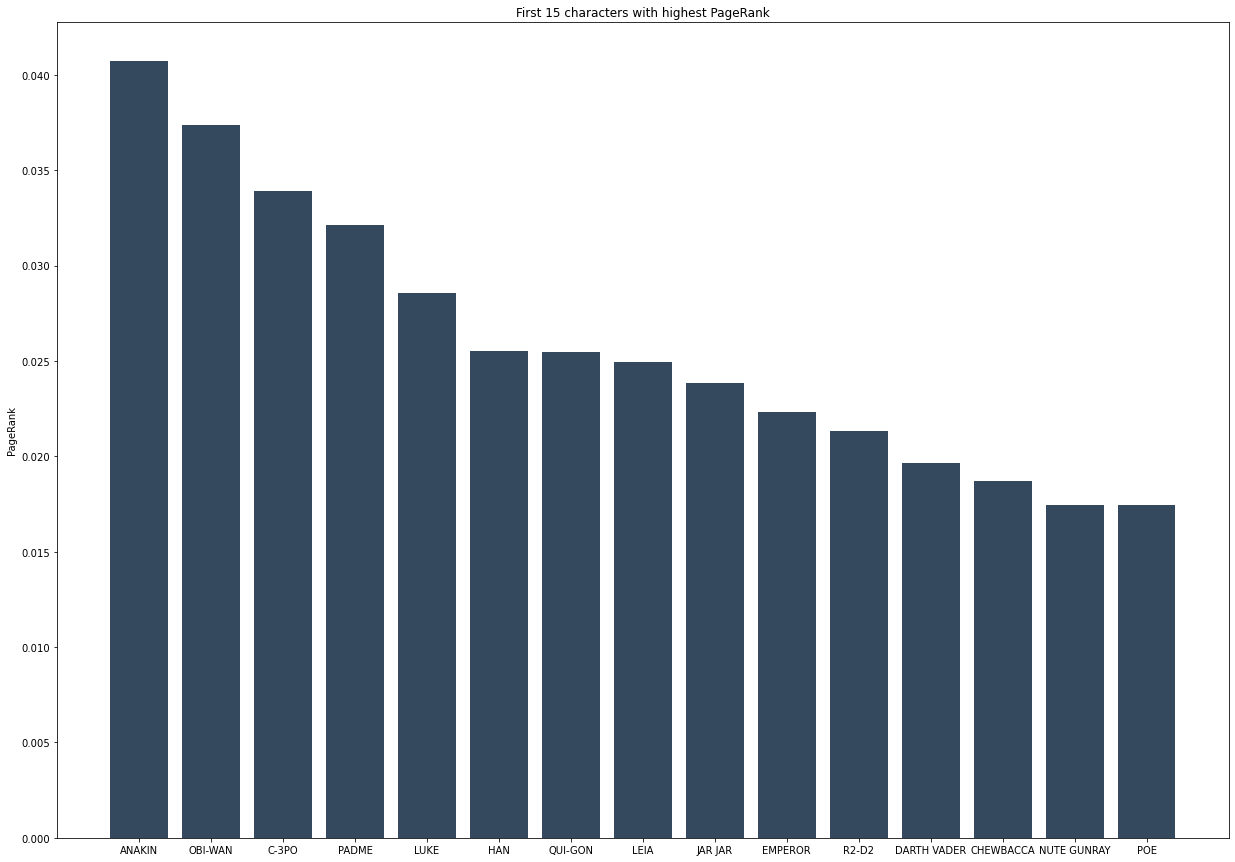

In [37]:
#PageRank
pr_of_total = nx.pagerank(G)

pr_max_15_chars = dict(sorted(pr_of_total.items(), key=operator.itemgetter(1), reverse=True)[:15])
print(pr_max_15_chars)
keys4 = pr_max_15_chars.keys()
values4 = pr_max_15_chars.values()
fig4, ax4 = plt.subplots()
ax4.set_ylabel('PageRank')
ax4.set_title('First 15 characters with highest PageRank')
plt.bar(keys4, values4, color='#34495E')


In [38]:
#Clustering coefficient
nx.average_clustering(G)

0.6868025421339279

In [48]:
#Triangles
triangles = nx.triangles(G)
print(triangles)

{'R2-D2': 98, 'CHEWBACCA': 74, 'BB-8': 33, 'QUI-GON': 114, 'NUTE GUNRAY': 40, 'PK-4': 1, 'TC-14': 5, 'OBI-WAN': 145, 'DOFINE': 2, 'RUNE': 4, 'TEY HOW': 2, 'EMPEROR': 95, 'CAPTAIN PANAKA': 30, 'SIO BIBBLE': 26, 'JAR JAR': 84, 'TARPALS': 0, 'BOSS NASS': 15, 'PADME': 136, 'RIC OLIE': 13, 'WATTO': 15, 'ANAKIN': 168, 'SEBULBA': 15, 'JIRA': 3, 'SHMI': 23, 'C-3PO': 153, 'DARTH MAUL': 5, 'KITSTER': 25, 'WALD': 8, 'FODE/BEED': 3, 'JABBA': 38, 'GREEDO': 3, 'VALORUM': 6, 'MACE WINDU': 51, 'KI-ADI-MUNDI': 25, 'YODA': 69, 'RABE': 10, 'BAIL ORGANA': 64, 'GENERAL CEEL': 4, 'BRAVO TWO': 3, 'BRAVO THREE': 3, 'CAPTAIN TYPHO': 13, 'SENATOR ASK AAK': 17, 'ORN FREE TAA': 3, 'SOLA': 6, 'JOBAL': 6, 'RUWEE': 6, 'TAUN WE': 4, 'LAMA SU': 1, 'BOBA FETT': 24, 'JANGO FETT': 4, 'OWEN': 18, 'BERU': 21, 'CLIEGG': 10, 'COUNT DOOKU': 29, 'SUN RIT': 15, 'POGGLE': 15, 'PLO KOON': 0, 'ODD BALL': 1, 'GENERAL GRIEVOUS': 3, 'FANG ZAR': 6, 'MON MOTHMA': 23, 'GIDDEAN DANU': 6, 'CLONE COMMANDER GREE': 0, 'CLONE COMMANDER CODY':

In [45]:
sum(triangles.values())

2577

In [46]:
sum(triangles.values())/3

859.0

In [50]:
#Homophily
r = nx.degree_assortativity_coefficient(G)
print(r)

-0.1856


{'R2-D2': 0.38735177865612647, 'CHEWBACCA': 0.4327485380116959, 'BB-8': 0.5, 'QUI-GON': 0.3247863247863248, 'NUTE GUNRAY': 0.3333333333333333, 'PK-4': 1.0, 'TC-14': 0.5, 'OBI-WAN': 0.21771771771771772, 'DOFINE': 0.6666666666666666, 'RUNE': 0.6666666666666666, 'TEY HOW': 0.6666666666666666, 'EMPEROR': 0.37549407114624506, 'CAPTAIN PANAKA': 0.8333333333333334, 'SIO BIBBLE': 0.9285714285714286, 'JAR JAR': 0.30434782608695654, 'TARPALS': 0, 'BOSS NASS': 1.0, 'PADME': 0.24242424242424243, 'RIC OLIE': 0.6190476190476191, 'WATTO': 1.0, 'ANAKIN': 0.1951219512195122, 'SEBULBA': 1.0, 'JIRA': 1.0, 'SHMI': 0.8214285714285714, 'C-3PO': 0.24285714285714285, 'DARTH MAUL': 0.8333333333333334, 'KITSTER': 0.6944444444444444, 'WALD': 0.8, 'FODE/BEED': 1.0, 'JABBA': 0.4175824175824176, 'GREEDO': 0.5, 'VALORUM': 1.0, 'MACE WINDU': 0.6538461538461539, 'KI-ADI-MUNDI': 0.6944444444444444, 'YODA': 0.5073529411764706, 'RABE': 1.0, 'BAIL ORGANA': 0.47058823529411764, 'GENERAL CEEL': 0.6666666666666666, 'BRAVO TW

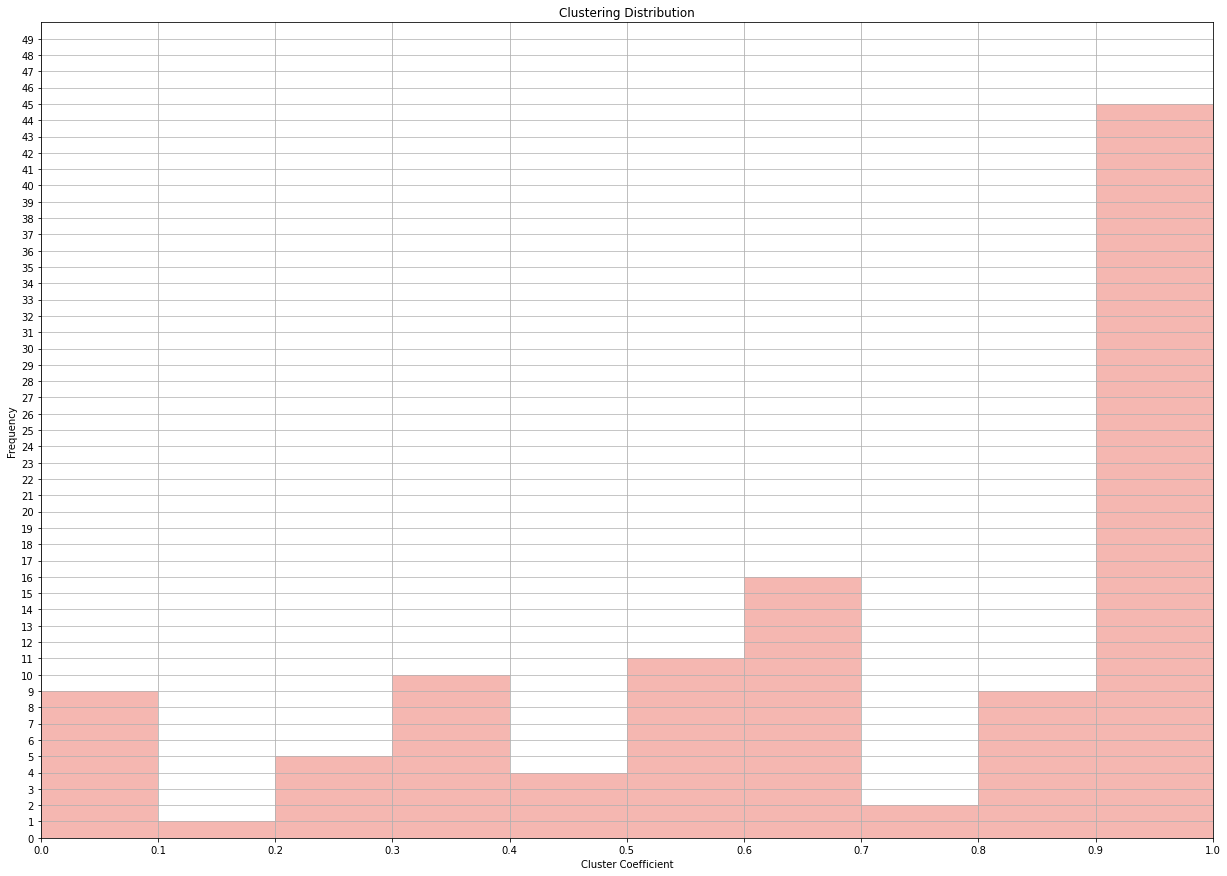

In [88]:
#Clustering coefficient Distribution
histogram_initial = nx.clustering(G)
print(histogram_initial)

degree = pd.Series(histogram_initial.values())
xscale = [i/10 for i in range(0,11)]
yscale = [i for i in range(0,50)]
degree.plot.hist(grid=True, rwidth=1,bins=10,
                   color='#F5B7B1',yticks=yscale ,ylim=(0,50), xlim=(0,1), xticks=xscale)
plt.title('Clustering Distribution')
plt.xlabel('Cluster Coefficient')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.9)    